<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/O_Terr%C3%ADvel_Naufr%C3%A1gio_do_Titanic_Ser%C3%A1_que_voc%C3%AA_sobreviveria%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O Terrível Naufrágio do Titanic... Será que eu sobreviveria?

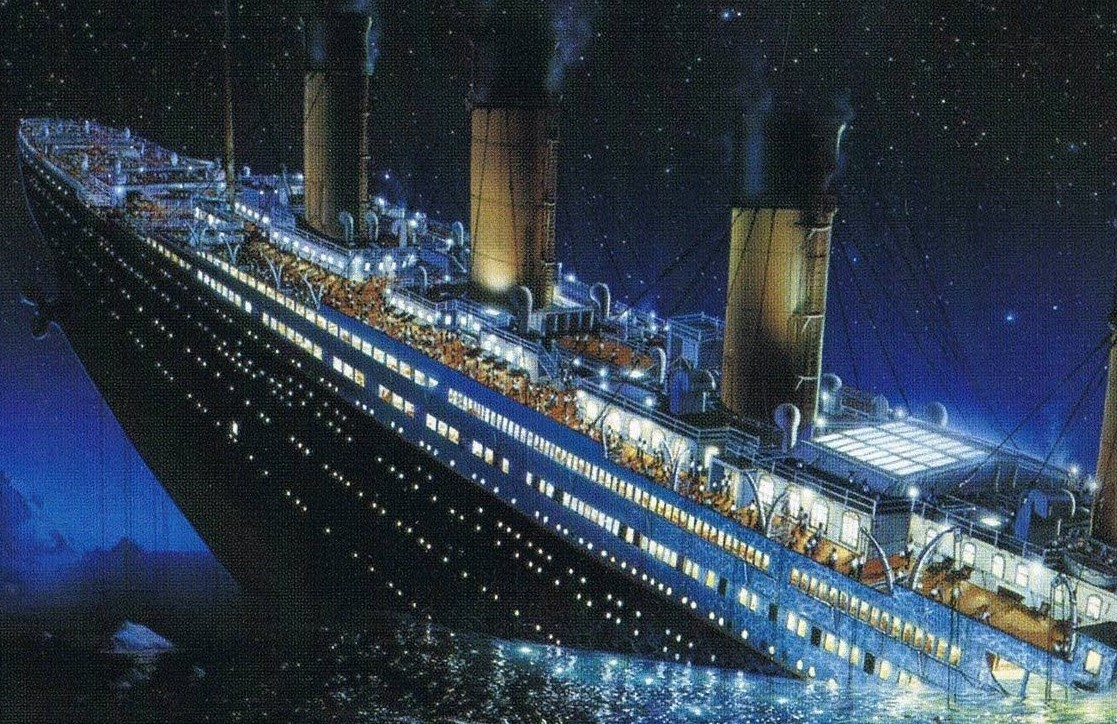

O Naufrágio do Titanic... Todos conhecemos a história, não é mesmo? O famoso navio que possuía uma grande tecnologia para sua época, colidiu 
com um Iceberg  no dia 15 de abril de 1912, o que ocasionou a morte de  1502 pessoas dos seus 2224 passageiros.


No entanto, 722 pessoas sobriviveram. Quais foram os motivos que levaram a justamente essas 722 pessoas a terem sobrevivido? As crianças e mulheres realmente tiveram mais chances de sobreviver do que os homens?

Agora podemos tentar descobir! Os dados reais foram divulgados e com eles juntamente com uma análise de ciência de dados podemos descobrir se eu ou você (isso mesmo, você!) sobreviveríamos a essa tragédia!

E ai, quer descobrir? Então é só continuar lendo que vamos chegar lá! 

Mas que fique claro, esse é um projeto de ciência de dados então o foco é passar a construção do código.

#1. Introdução ao problema 

## Pequena introdução sobre o Titanic!

O Titanic foi construído para ser o navio mais morderno e luxuoso já feito em sua época, levaram 2 anos e cerca de 7,5 milhões de dólares (valores da época) para que o navio apelidado de ‘inafundável’ tivesse os seus 53 metros de altura,
269,69 metros de comprimento e 28 metros de largura construídos.

Seu naufrágio destacou vários pontos fracos do projeto, como deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas, além de causas naturais (como o clima).  Ainda que quem sobreviveu tenha contado com o acaso, vontade divina, sorte ou do que você queira chamar, certos tipos conjuntos de pessoas eram mais tendentes a sobriver do que outros. Um exemplo eram as mulheres, crianças e passageiros da 1ª Classe (fato que vai ser realmente constatado mais tarde!).


## Objetivos

O objetivo final é construir um modelo que prevê se determinada pessoa sobreviveria ao naufrágio, apenas colocando os seus dados no programa.

Para isso, vamos inicialmente fazer toda uma análise sobre os atributos da base de dados como um cientista de dados, tentando achar algum padrão que nos indique algo! 


#2. Importação dos dados

A obtenção dos dados foi feita no Kaggle. Lá eles diponibilizaram dois arquivos:

A base de dados de treinamento (train.csv):

Vamos utilizá-la para treinar nosso algoritmo de Machine Learning. Nela está contida as informações do passageiro e se ele sobreviveu ou não.
A base de dados de teste(test.csv):

Utilizada para testar o modelo. Nela estão contidas todas as informações sobre o passageiro menos se ele sobreviveu ou não, pois é isso que queremos descobrir.
OBS: todos os passageiros classificados aqui são diferentes do da base de treinamento.

In [3]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [5]:
#Salvando as vases de dados
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Vamos agora ver a quantidade de entradas e variáveis que nosso arquivo possui.

In [ ]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


#3. Análise dos Dados 

**Dicionário das variáveis:**

* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre:
 * 0 = Não
 * 1 = Sim
* Pclass: Classe do bilhete:
 * 1 = 1ª Classe
 * 2 = 2ª Classe
 * 3 = 3ª Classe
*Name: Nome do passageiro
*Sex: Sexo do passageiro
*Age: Idade do passageiro
*SibSp: Quantidade de cônjuges e irmãos a bordo
*Parch: Quantidade de pais e filhos a bordo
*Ticket: Número da passagem
*Fare: Preço da Passagem
*Cabin: Número da cabine do passageiro
*Embarked: Porto no qual o passageiro embarcou:
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

Antes de começarmos, vamos definir o que significa cada atributo e ver qual o tipo de cada um, posteriormente, vamos verificar valores faltantes e a presença de *outliers*! Mas sempre lembrando que temos o objetivo de descobrir se o passageiro sobreviveu ou não e para isso vamos ficar de olho na variável `survival`!

##Q1. Quais os tipos de cada atributo?

Os tipos dos nossos atributos são:

* Variáveis Numéricas:
 * Discretas:
   * Pclass
   * SibSp
   * Parch
 * Contínuas
   * Age
   * Fare
* Alvo (A que queremos descobrir!):
  * Survived
* Chave Primária
   * PassengerId
* Variáveis Categóricas
 * Name
 * Sex
 * Ticket
 * Cabin
 * Embarked

In [6]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treinamento
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Q2. Existem valores faltantes?

Vamos verificar inicialmente se existem valores faltantes. 

In [14]:
# Ver quantos valores NaN existem
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Constatado que existem valores faltantes, vamos ver as suas proporções com base no total de dados.

Como é possível verificar abaixo, o atributo `Cabin` possui 77% dos seus valores sendo faltantes ‘NaN’, já o atributo `Age` possui quase 20% e, por fim, `Embarked` possui 0,2% de informações faltantes.

In [ ]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

##Q3. Existem *outliers*?

Queremos, agora, achar *outliers*! Reconhecendo eles, assim como os valores faltantes, a limpeza dos dados fica mais simples, seja excluindo uma entrada ou preenchendo os dados com algum método como, por exemplo, preenchimento com a média/mediana.


In [ ]:
# ver algumas estatísticas dos atributos para a percepção  se existem outliers
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


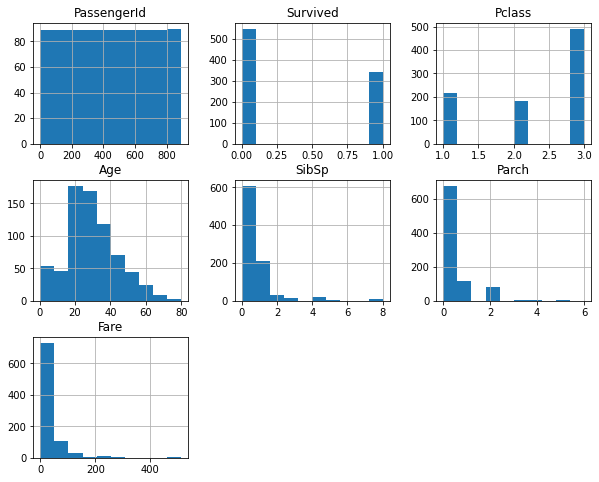

In [ ]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

Aparentemente, não temos muitos outliers!

Podemos ver também as estatísticas dos atributos que não são números.

In [ ]:
# ver estatísticas dos atributos 
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Giles, Mr. Frederick Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Desse modo, vemos que:
 * Os valores para Name são únicos, um para cada pessoa como é de se esperar.
 * Name e Sex não possuem valores faltantes.
 * Existem apenas dois sexos, Masculino e Feminino, tendo o Masculino como o de maior frequência (577/891 = 65%).
 * O Porto no qual embarcaram mais passageiros é o de S = Southampton.


##Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??

No começo do projeto foi feita a pergunta:

**“As crianças e mulheres realmente tiveram mais chances de sobreviver do que os homens?”**

Os gráficos abaixo vão possibilitar uma possível resposta para essa pergunta, além da criação de outras hipóteses. Além dos gráficos, vamos ver também se existem correlações entre os atributos!


### Influência do sexo na probabilidade de sobrevivência


In [ ]:
# analisar a probabilidade de sobrevivência pelo sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


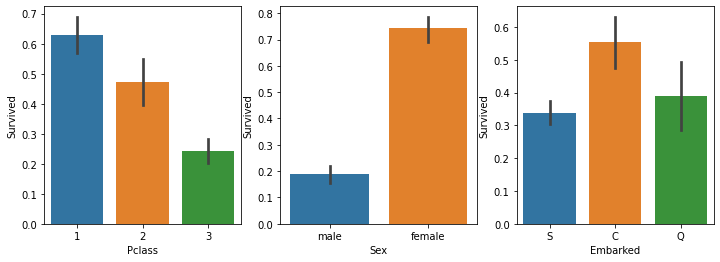

In [ ]:
#Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(12,4))

sns.barplot(x='Pclass', y='Survived', data=train, ax=axis1)
sns.barplot(x='Sex', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

Assim, já podemos fazer três estimativas:
* Os passageiros da primeira classe tinham mais chance de sobreviver do que os da segunda e terceira classe, chegando a ter o dobro de chance do que os passageiros da terceira classe.

* As mulheres tem muito mais chance de sobreviver do que os homens.

* Pessoas que embarcaram no porto de Cherbourg tem mais chance de sobreviver do que as que embarcaram em Queenstown e Southampton. 
 


### Influência da idade na probabilidade de sobrevivência

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


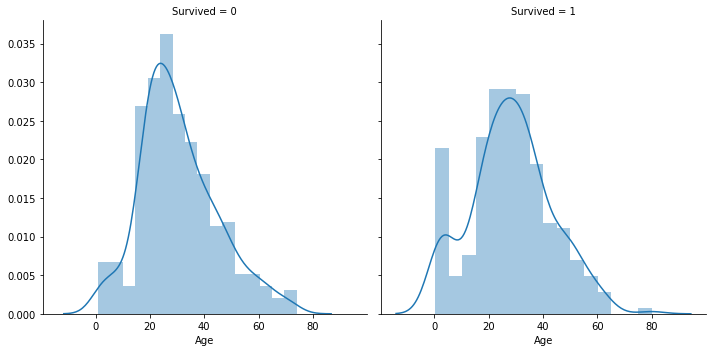

In [16]:
## ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived', size=5)
age_survived.map(sns.distplot, 'Age')

Analisando o gráfico dos sobreviventes (`Survived`=1), podemos ver que existe um pico na parte de menos de 10 anos. Então nossa hipótese estava correta, crianças também tinham mais chance de sobreviver!

### Correlação entre os atributos e seu Heatmap

Vamos agora analisar a correlação entre as variáveis a partir do heatmap entre elas.

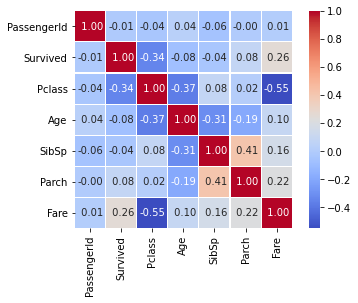

In [ ]:
#plotar o heatmap para as variáveis numéricas 
sns.heatmap(train.corr(), cmap='coolwarm',  linewidths=0.1, vmax=1.0, square=True, fmt=' .2f', linecolor='white', annot=True)

Observamos então que os atributos não tem muita correlação entre si fora `SibSp` e `Parch`, mas essa correlação é de certa forma óbvia.

#4. Preparação dos Dados

##Q1. Juntando os datasets de treino e teste

Vamos agora juntar os datasets de treinamento e teste eu um único, para que seja possível fazer um feature engineering, criar variáveis dummy ou codificar as variáveis. 

Por isso, fazer todas as etapas para um único DataFrame e, futuramente, separar novamente a base de treinamento e teste nos garante um processo mais fácil.

In [ ]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treinamento
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


##Q2. Selecionar os atributos

Em qualquer base de dados reais, sempre vão existir atributos que não vão acrescentar em nada no seu objetivo. No nosso caso, por exemplo, o número de identificação ou o nome do passageiro não altera em nada a chance dele sobreviver. 

Dessa forma, vamos excluir os atributos que `PassengerId`, `Name`, `Ticket`  e `Cabin` que não vão colaborar com o nosso objetivo. 


In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Ficamos então com as seguintes variáveis: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` e `Embarked`.

##Q3. Valores Faltantes 

Vamos tratar agora dos valores faltantes da nossa base de dados. Temos duas opções:
 * Completar esses dados de alguma forma eficiente (média, mediana, valor mais frequente)
 * Excluir a linha inteira.

Mas para nosso caso, excluir a linha inteira por causa do dado faltante de um atributo não parece muito  uma boa ideia né? 

Portanto, vamos optar pela primeira opção e completar os dados. 

Nos atributos `Age` e `Fare`, vou colocar o valor da mediana, e para `Embarked`, vou colocar o valor com maior frequência.


In [ ]:
# ver a quantidade de valores faltantes dos nossos atributos
df_merged.isnull().sum().sort_values(ascending=False)

Age         263
Embarked      2
Fare          1
Parch         0
SibSp         0
Sex           0
Pclass        0
dtype: int64

In [ ]:
# completar valores faltantes no dataset df_merged

# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

##Q4. Preparar as variáveis pro modelo

Para que nosso algoritmo funcione é necessário que todos os dados dos nossos atributos sejam numéricos. No entanto, temos dados categóricos. O que fazer agora? Simples! Vamos transformar os dados categóricos em numéricos. 

Por exemplo, para o atributo `sex` as entradas *male* e *female* vão se transformar em 0 e 1, respectivamente. Já para o atributo `Embarked`, vamos aplicar o conceito das variáveis dummy, o que vai, consequentemente, criar uma nova coluna para cada valor possível da variável categórica.


In [ ]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


##Q5. Recuperando os datasets de treino e teste

Como dito antes, iriamos juntar a base de dados de treinamento e teste aplicar o pré-processamento dos dados e, posteriormente, separá-los de novo. 

Chegou a hora.

In [ ]:
# recuperar datasets de treinamento e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [ ]:
# visualizar as 5 primeiras linhas da base de dados de treinamento
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [ ]:
# visualizar as 5 primeiras linhas da base de dados de teste
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
891,3,0,34.5,0,0,7.8292,0,0,1,0
892,3,1,47.0,1,0,7.0000,0,0,0,1
893,2,0,62.0,0,0,9.6875,0,0,1,0
894,3,0,27.0,0,0,8.6625,0,0,0,1
895,3,1,22.0,1,1,12.2875,0,0,0,1


#5. Construção do Modelo e Avaliação

Até agora tudo que foi feito foi um diagnóstico sobre a base dados para entendermos o problema, testar hipóteses e descartar dados desnecessários.

Agora vamos aplicar 2 modelos de *Machine Learning* para concluirmos nosso objetivo. 

Os modelos são : 
 * *Árvore de Decisão*
 * *Regressão Logística*


###Q1. Regressão Logística

Vamos começar pelo modelo de Regressão Logística. 

In [ ]:
# importar biblioteca do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression

In [ ]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target)*100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId, "Survived": y_pred_lr})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

Como é possível ver na figura abaixo, obtivemos um score de 76,3%

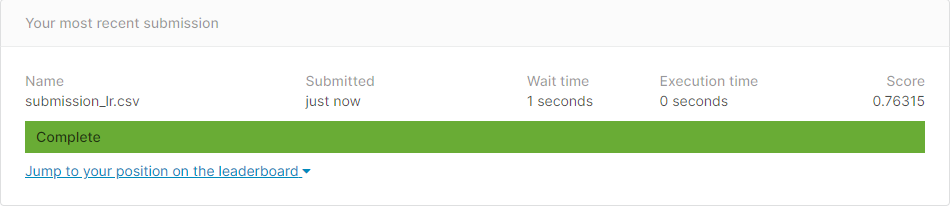

##Q2. Árvore de Decisão

Vamos ver qual a precisão do modelo Árvores de Decisão, seguindo os mesmo passos.

In [ ]:
# importar biblioteca do modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


Precisão Agora, vemos que a acurácia chegou em 82,72%, ou seja, foi maior do que o modelo de regressão logística que obteve 80,13%.

Vamos agora gerar um novo arquivo e submete-lo ao Kaggle.


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

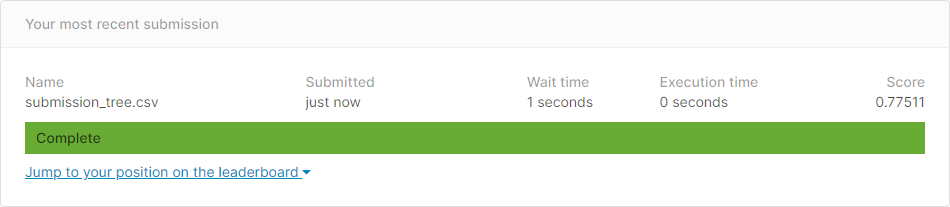

Obtivemos então um score de 77,5%.

##Q3. Matriz de Confusão, Precision e Recall


O Kaggle disponibiliza também um arquivo que contém se os passageiros da base de teste sobreviveram ou não.

Vamos adicionar esse arquivo agora, para depois compará-lo com as nossas previsões.


In [ ]:
# adicionando arquivo e salvando a coluna Survived na variável resp_final
respostas = pd.read_csv('/content/gender_submission.csv')
resp_final = respostas.iloc[:, 1].values


Agora, vamos comparar o arquivo com as nossas previsões e ver o percentual de acerto.

In [ ]:
# Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(resp_final, y_pred_lr)

0.9545454545454546

Tivemos então excelentes 95,4% de acerto!

Vamos agora ver a matriz de confusão para termos uma noção de como foram os acertos e erro.


In [ ]:
# Matriz de Confusão 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(resp_final, y_pred_lr)
cm

array([[254,  12],
       [  7, 145]])

Agora, vamos comparar o arquivo com as nossas previsões e ver o percentual de acerto.

Pela matriz acima, é possível ver que: 
 * 254 passageiros foram classificados corretamente como não sobreviveram.
 * 12 foram classificados como sobreviveram de forma errada.
 * 7 foram classificados como não sobreviveram de forma errada.
 * 145 foram classificados com sobreviveram de forma correta.


Por fim, vamos ver o valor da precisão e do recall do nosso modelo!

In [ ]:
#Recall
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision_score(resp_final, y_pred_lr)
recall_score(resp_final, y_pred_lr)
f1_score(resp_final, y_pred_lr, average='macro')
print(classification_report(resp_final, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



Pela tabela acima, é possível ver que o nosso modelo tem uma porcentagem de acerto consideravelmente alta!

Agora você está se perguntando... “Mas pelo Kaggle deu 76% e por aqui deu 96%, como assim?”.

A resposta é simples. 

A forma de avaliar os resultados do Kaggle pode perder um pouco da performance comparado com uma métrica simples mais direta. Então no fim, não há nada de errado!


#6. Eu sobreviveria ao Titanic?

Por fim, vamos ao teste mais aguardad. Será que eu sobreviveria à tragedia do Titanic????

Para fazer o teste, vou considerar que eu viajaria sozinho, na 3 ª Classe, com 21 anos tendo pago o ticket médio e embarcado no porto de Cherbourg.

In [ ]:
vinicius = np.array([3, 0, 21, 0, 0, 32.2, 0, 0, 1, 0]).reshape((1, -1))

In [ ]:
# verificar se nós teríamos sobrevivido
print("Vinicius:\t{}".format(tree_model.predict(vinicius)[0]))

Vinicius:	0


Dessa forma, provavelmente, eu não teria sobrevivido ao naufrágio do Titanic :(



Agora é com você. Replique esse projeto no seu computador, para que assim você consiga testar várias probabilidades para saber se você sobreviveria ao desastre!

**“E por hoje é só pessoal!”**